<a href="https://colab.research.google.com/github/jingerkats/data_analytics/blob/main/COVID_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Environment Set Up**

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
933493,2021-01-15,Sweetwater,Wyoming,56037.0,3262,26.0
933494,2021-01-15,Teton,Wyoming,56039.0,2605,4.0
933495,2021-01-15,Uinta,Wyoming,56041.0,1806,9.0
933496,2021-01-15,Washakie,Wyoming,56043.0,839,23.0


# **Data Collection**

In [239]:
#filter for a chosen state
NY_cases_by_county = df[df["state"] == "New York"]

#print total cases and total deaths
print("Cumulative Total Cases and Total Deaths for New York" + "\n")
relevant_measures = ["cases", "deaths"]
NY_total = NY_cases_by_county.groupby("date")[relevant_measures].sum()
print(NY_total)
print("\n\n")

#calculate new cases and new deaths per day
dates_list = list(NY_total.index)
NY_cases_list = NY_total["cases"].tolist()
NY_deaths_list = NY_total["deaths"].tolist()

new_cases = np.diff(NY_cases_list).tolist()
new_deaths = np.diff(NY_deaths_list).tolist()
new_cases.insert(0, "NaN")
new_deaths.insert(0, "NaN")
#first entry in new_cases and new_deaths is NaN because there is no data before 2020-03-01 to subtract

NY_df = pd.DataFrame(list(zip(dates_list, new_cases, new_deaths)),
                      columns = ["date","new cases", "new deaths"])
NY_df = NY_df.set_index("date")

print("New Cases and New Deaths for New York" + "\n")
print(NY_df)



Cumulative Total Cases and Total Deaths for New York

              cases   deaths
date                        
2020-03-01        1      0.0
2020-03-02        1      0.0
2020-03-03        2      0.0
2020-03-04       11      0.0
2020-03-05       22      0.0
...             ...      ...
2021-01-11  1150028  39404.0
2021-01-12  1164819  39588.0
2021-01-13  1179523  39760.0
2021-01-14  1193710  39997.0
2021-01-15  1213179  40203.0

[321 rows x 2 columns]



New Cases and New Deaths for New York

           new cases new deaths
date                           
2020-03-01       NaN        NaN
2020-03-02         0          0
2020-03-03         1          0
2020-03-04         9          0
2020-03-05        11          0
...              ...        ...
2021-01-11     14179        196
2021-01-12     14791        184
2021-01-13     14704        172
2021-01-14     14187        237
2021-01-15     19469        206

[321 rows x 2 columns]


# **Data Wranglng and EDA (Exploratory Data Analysis)**

In [240]:
#print the most recent 30 days' worth of data
print("Most Recent 30 Days COVID Data in NY" + "\n")
last_30_days = NY_df.tail(n=30)
print(last_30_days)
print("\n")


Most Recent 30 Days COVID Data in NY

           new cases new deaths
date                           
2020-12-17     10498        125
2020-12-18     12606        128
2020-12-19      9913        122
2020-12-20      9454        120
2020-12-21      9456        130
2020-12-22     10299        153
2020-12-23     11740        154
2020-12-24     13347        150
2020-12-25     12881        135
2020-12-26     11048        131
2020-12-27      8205        130
2020-12-28     10334        118
2020-12-29     12020        138
2020-12-30     12917        156
2020-12-31     15393        145
2021-01-01     17033        176
2021-01-02     15849        121
2021-01-03     12232        147
2021-01-04     11242        166
2021-01-05     13142        148
2021-01-06     16016        171
2021-01-07     17588        197
2021-01-08     19560        163
2021-01-09     17839        195
2021-01-10     16308        167
2021-01-11     14179        196
2021-01-12     14791        184
2021-01-13     14704        172
20

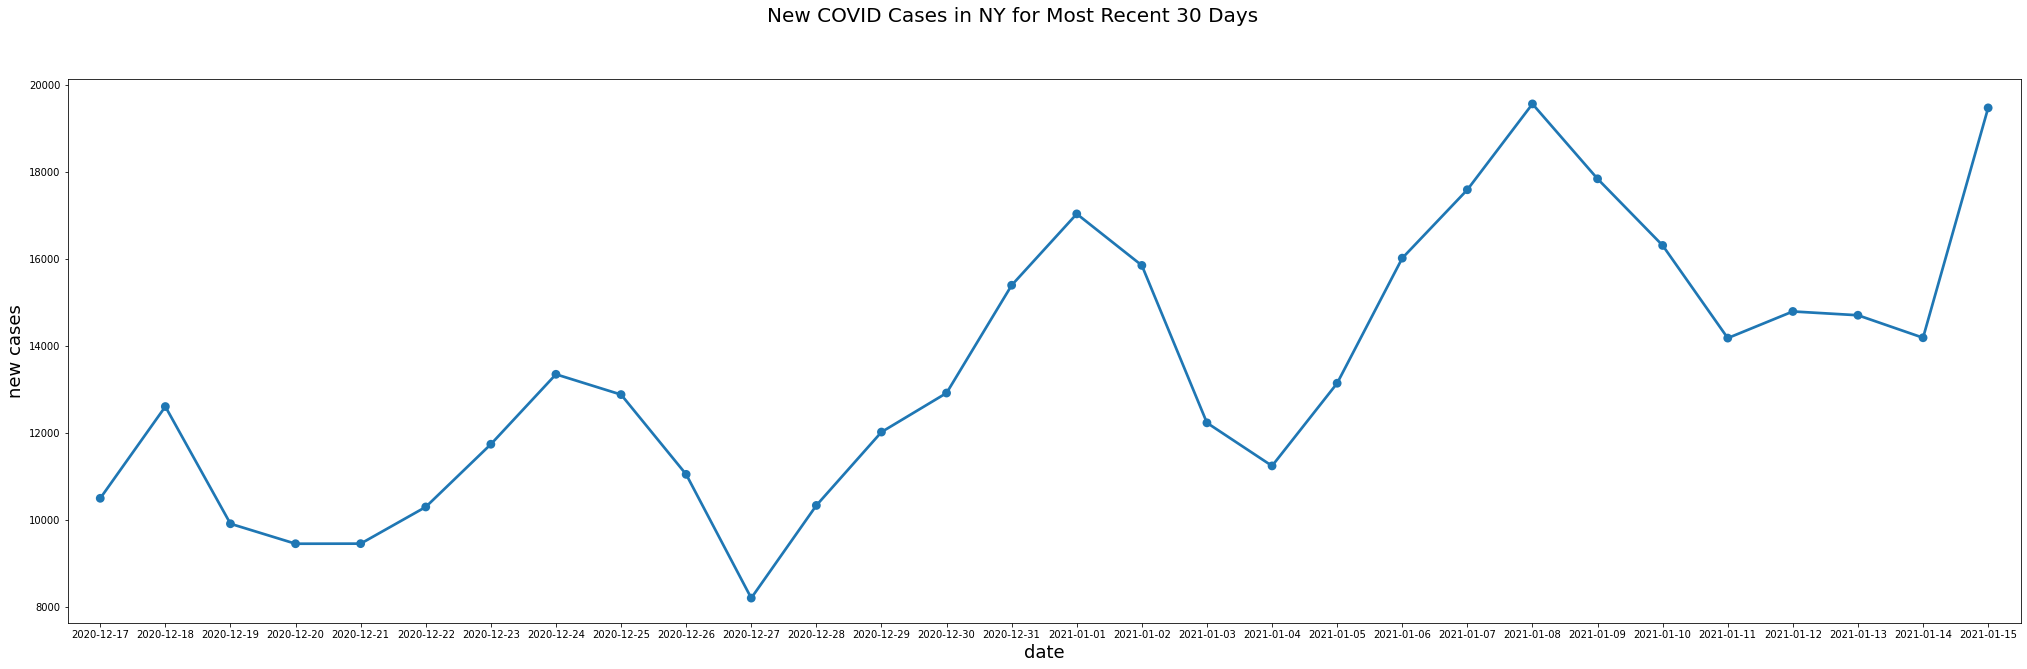

In [287]:
#Exploratory Data Analysis
plt.figure(figsize=(35,10))
plt.suptitle("New COVID Cases in NY for Most Recent 30 Days", fontsize = 20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=18)
sns.pointplot(x=last_30_days.index, y="new cases", data=last_30_days)

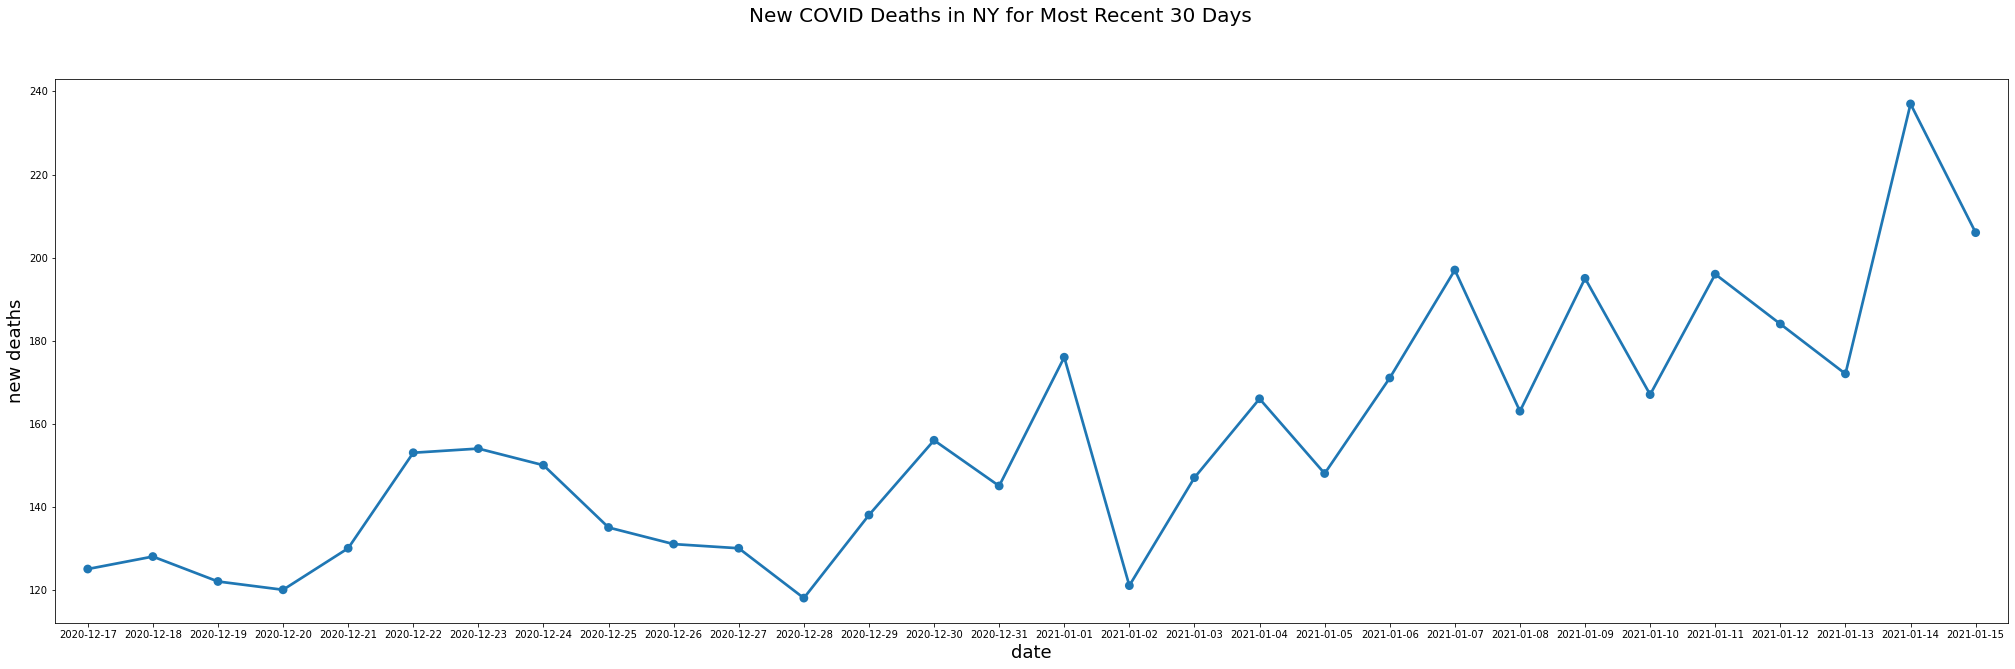

In [288]:
plt.figure(figsize=(35,10))
plt.suptitle("New COVID Deaths in NY for Most Recent 30 Days", fontsize = 20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=18)
sns.pointplot(x=last_30_days.index, y="new deaths", data=last_30_days)

In [194]:
print("Averages in Last 30 Days")
print(last_30_days.mean(axis=0))

print("\nStandard Deviations in Last 30 Days")
print(last_30_days.std(axis=0))

print("\nMin and Max in Last 30 Days")
print("New Cases Max: " + str(max(last_30_days["new cases"])))
print("New Cases Min: " + str(min(last_30_days["new cases"])))
print("New Deaths Max: " + str(max(last_30_days["new deaths"])))
print("New Cases Min: " + str(min(last_30_days["new deaths"])))

Averages in Last 30 Days
new cases     13475.000000
new deaths      156.033333
dtype: float64

Standard Deviations in Last 30 Days
new cases     3053.039187
new deaths      29.781368
dtype: float64

Min and Max in Last 30 Days
New Cases Max: 19560
New Cases Min: 8205
New Deaths Max: 237.0
New Cases Min: 118.0


# **Understand NY COVID Data in Last 30 Days**

Over the last 30 days, daily new COVID cases and new COVID deaths in New York have had an upwards trend, with new cases increasing from 10,498 to 19,469 and new deaths increasing from 125 to 206. The average new cases per day was 13,475 with a standard deviation of 3,053 cases while the average new deaths per day was 156 with a standard deviation of 30 deaths.
Since NY COVID cases are on the rise, people should continue to quarentine and social distance, and take all safety precautions necessary to protect public health. 

# **NYC Data**

In [224]:
#filter for a chosen county
NYC_cases = df[df["county"] == "New York City"]

#print total cases and total deaths
print("Cumulative Total Cases and Total Deaths for New York City" + "\n")
NYC_total = NYC_cases.groupby("date")[relevant_measures].sum()
print(NYC_total)
print("\n\n")

#calculate new cases and new deaths per day
dates_list = list(NYC_total.index)
NYC_cases_list = NYC_total["cases"].tolist()
NYC_deaths_list = NYC_total["deaths"].tolist()

NYC_new_cases = np.diff(NYC_cases_list).tolist()
NYC_new_deaths = np.diff(NYC_deaths_list).tolist()
NYC_new_cases.insert(0, "NaN")
NYC_new_deaths.insert(0, "NaN")
#first entry in new_cases and new_deaths is NaN because there is no data before 2020-03-01 to subtract

NYC_df = pd.DataFrame(list(zip(dates_list, NYC_new_cases, NYC_new_deaths)),
                      columns = ["date","new cases", "new deaths"])
NYC_df = NYC_df.set_index("date")

print("New Cases and New Deaths for New York City" + "\n")
print(NYC_df)
print("\n")

#print the most recent 30 days' worth of data
print("Most Recent 30 Days COVID Data in NYC" + "\n")
last_30_days_NYC = NYC_df.tail(n=30)
print(last_30_days_NYC)
print("\n")

Cumulative Total Cases and Total Deaths for New York City

             cases   deaths
date                       
2020-03-01       1      0.0
2020-03-02       1      0.0
2020-03-03       2      0.0
2020-03-04       2      0.0
2020-03-05       4      0.0
...            ...      ...
2021-01-11  493306  25635.0
2021-01-12  498877  25698.0
2021-01-13  504826  25741.0
2021-01-14  510711  25834.0
2021-01-15  517963  25909.0

[321 rows x 2 columns]



New Cases and New Deaths for New York City

           new cases new deaths
date                           
2020-03-01       NaN        NaN
2020-03-02         0          0
2020-03-03         1          0
2020-03-04         0          0
2020-03-05         2          0
...              ...        ...
2021-01-11      5755         73
2021-01-12      5571         63
2021-01-13      5949         43
2021-01-14      5885         93
2021-01-15      7252         75

[321 rows x 2 columns]


Most Recent 30 Days COVID Data in NYC

           new cases new 

# **Comparing NYC Data to NY State Data**

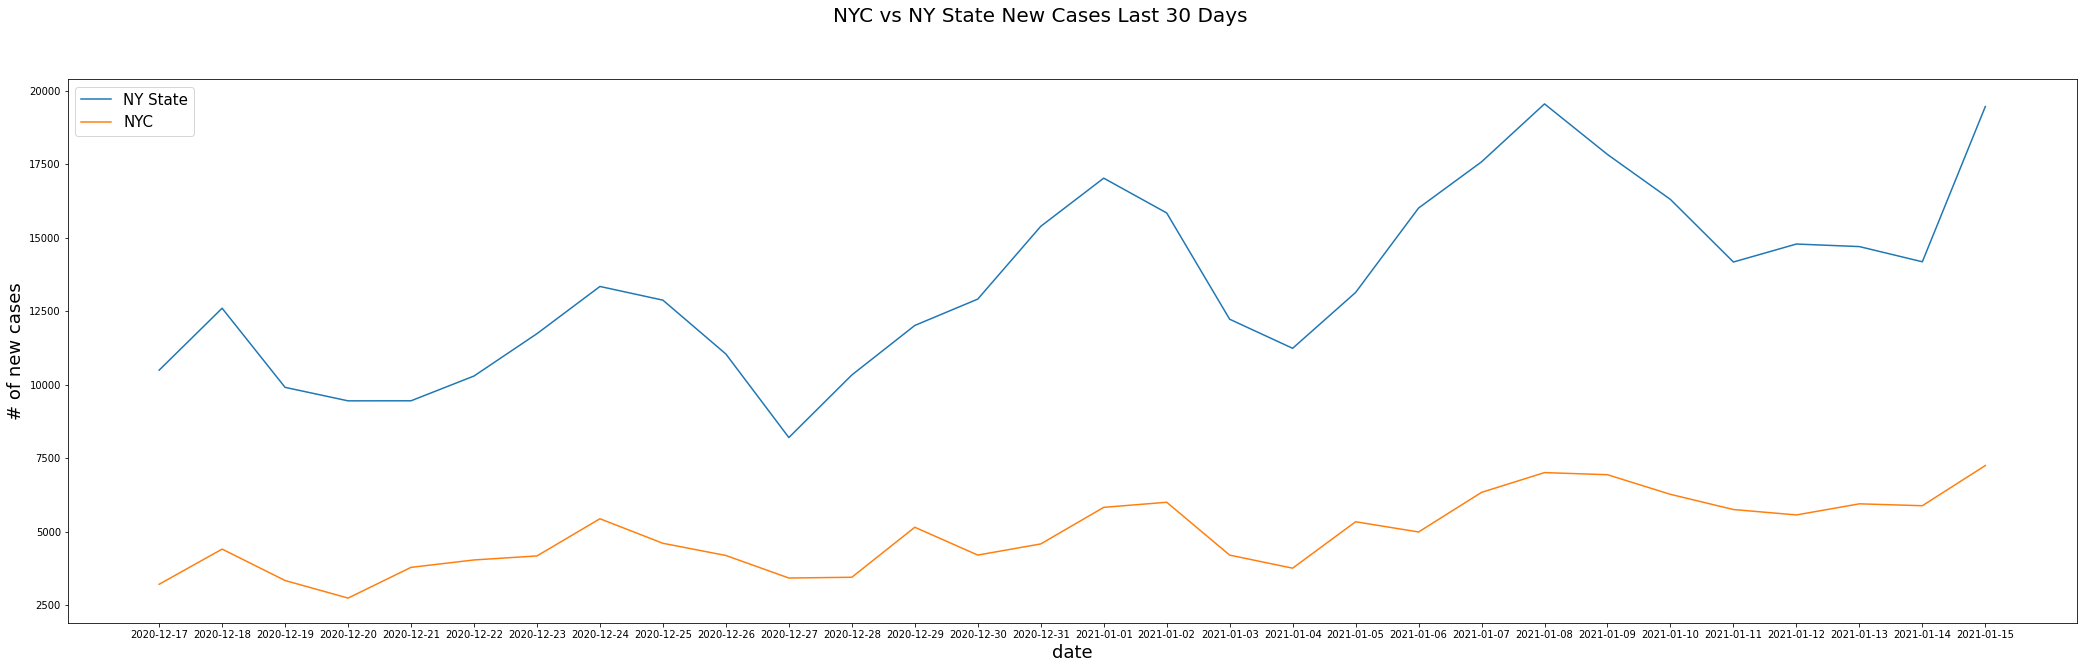

In [298]:
#comparing new cases
plt.figure(figsize=(36,10))
plt.suptitle("NYC vs NY State New Cases Last 30 Days", fontsize = 20)
plt.xlabel("date", fontsize=18)
plt.ylabel("new cases", fontsize=18)

#NY State line
NY_x = last_30_days.index
NY_y = last_30_days["new cases"]
plt.plot(NY_x, NY_y, label = "NY State")

#NYC line
NYC_x = last_30_days_NYC.index
NYC_y = last_30_days_NYC["new cases"]
plt.plot(NYC_x, NYC_y, label = "NYC")

plt.xlabel("date")
plt.ylabel("# of new cases")
plt.legend(prop = {"size" : 15})

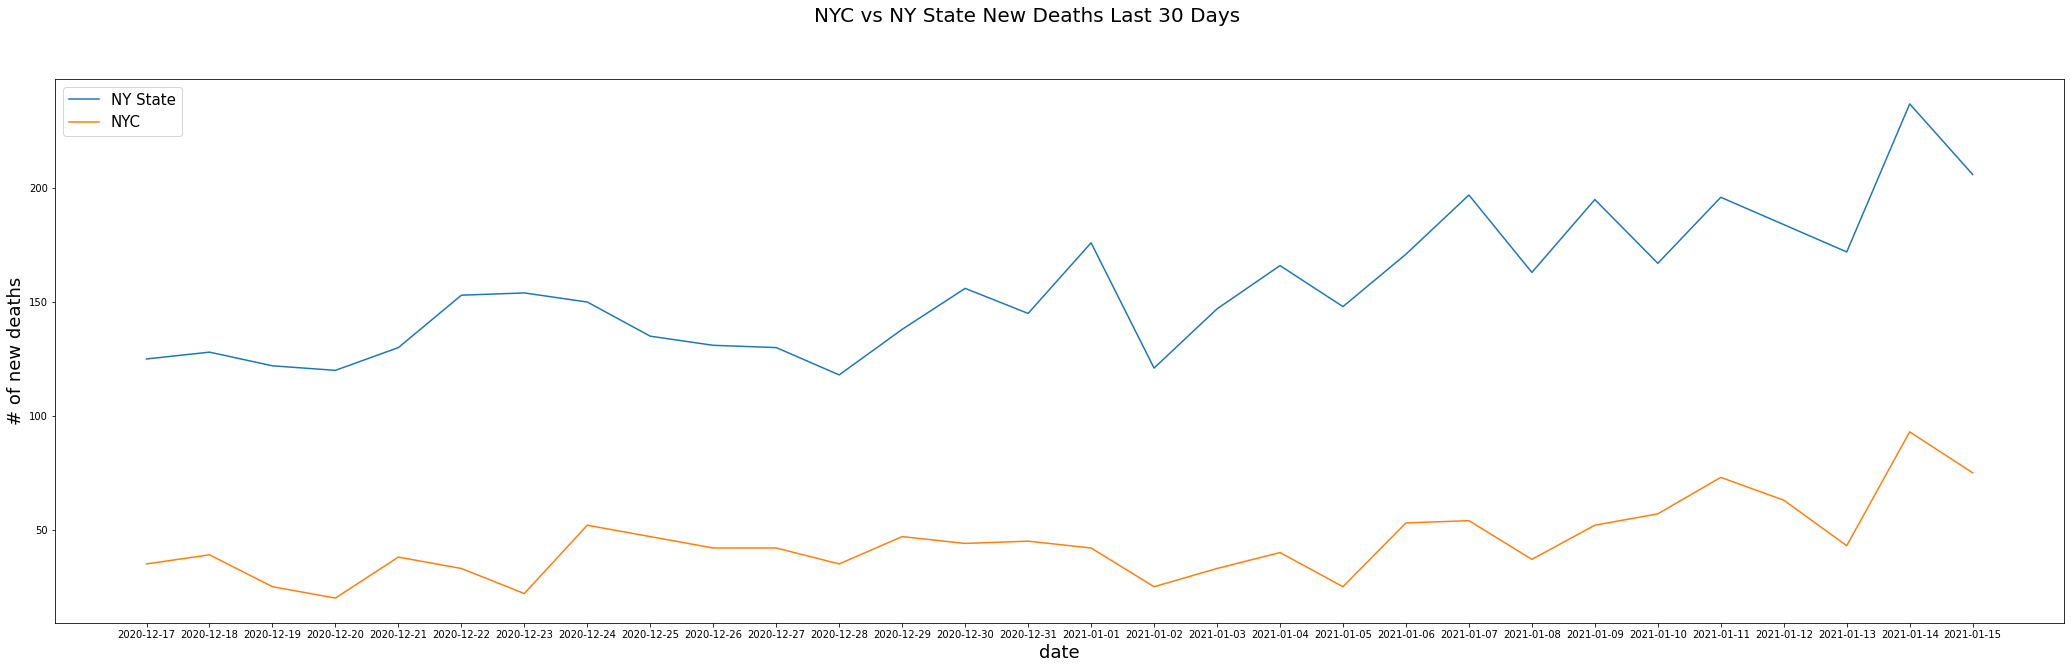

In [297]:
#comparing new deaths
plt.figure(figsize=(36,10))
plt.suptitle("NYC vs NY State New Deaths Last 30 Days", fontsize = 20)
plt.xlabel("date", fontsize=18)
plt.ylabel("new cases", fontsize=18)

#NY State line
NY_death_x = last_30_days.index
NY_death_y = last_30_days["new deaths"]
plt.plot(NY_death_x, NY_death_y, label = "NY State")

#NYC line
NYC_death_x = last_30_days_NYC.index
NYC_death_y = last_30_days_NYC["new deaths"]
plt.plot(NYC_death_x, NYC_death_y, label = "NYC")

plt.xlabel("date")
plt.ylabel("# of new deaths")
plt.legend(prop = {"size" : 15})

From the line plots, we can see that the number of COVID cases and COVID deaths is very slightly more volatile in the entire NY state than in NYC. However, the difference is small enough that it can probably be explained by the naturally exponential spread of COVID, rather than by policy differences or public response. A regression analysis is needed to confirm this.

# **Comparing NY COVID 19 Data with Florida Data**

In [312]:
#filter for Florida
FL_cases_by_county = df[df["state"] == "Florida"]

# total cases and total deaths
FL_total = FL_cases_by_county.groupby("date")[relevant_measures].sum()

#calculate new cases and new deaths per day
FL_cases_list = FL_total["cases"].tolist()
FL_deaths_list = FL_total["deaths"].tolist()

FL_new_cases = np.diff(FL_cases_list).tolist()
FL_new_deaths = np.diff(FL_deaths_list).tolist()
FL_new_cases.insert(0, "NaN")
FL_new_deaths.insert(0, "NaN")

FL_df = pd.DataFrame(list(zip(dates_list, FL_new_cases, FL_new_deaths)),
                      columns = ["date","new cases", "new deaths"])
FL_df = FL_df.set_index("date")

#print the most recent 30 days' worth of data
print("Most Recent 30 Days COVID Data in FL" + "\n")
FL_last_30_days = FL_df.tail(n=30)
print(FL_last_30_days)
print("\n")


Most Recent 30 Days COVID Data in FL

           new cases new deaths
date                           
2020-12-17     13148        101
2020-12-18     13000         96
2020-12-19     11682         72
2020-12-20      8401         95
2020-12-21     11015        112
2020-12-22     10434         74
2020-12-23     11384        120
2020-12-24     13147        121
2020-12-25         0          0
2020-12-26     17042        140
2020-12-27      7391         77
2020-12-28      8198         96
2020-12-29     12075        101
2020-12-30     13871        137
2020-12-31     17192        127
2021-01-01         0          0
2021-01-02     31518        217
2021-01-03     10603         97
2021-01-04     11256        103
2021-01-05     15431         98
2021-01-06     17783        129
2021-01-07     19816        164
2021-01-08     19530        185
2021-01-09     15445        138
2021-01-10     12313        108
2021-01-11     11576        159
2021-01-12     14896        156
2021-01-13     13990        169
20

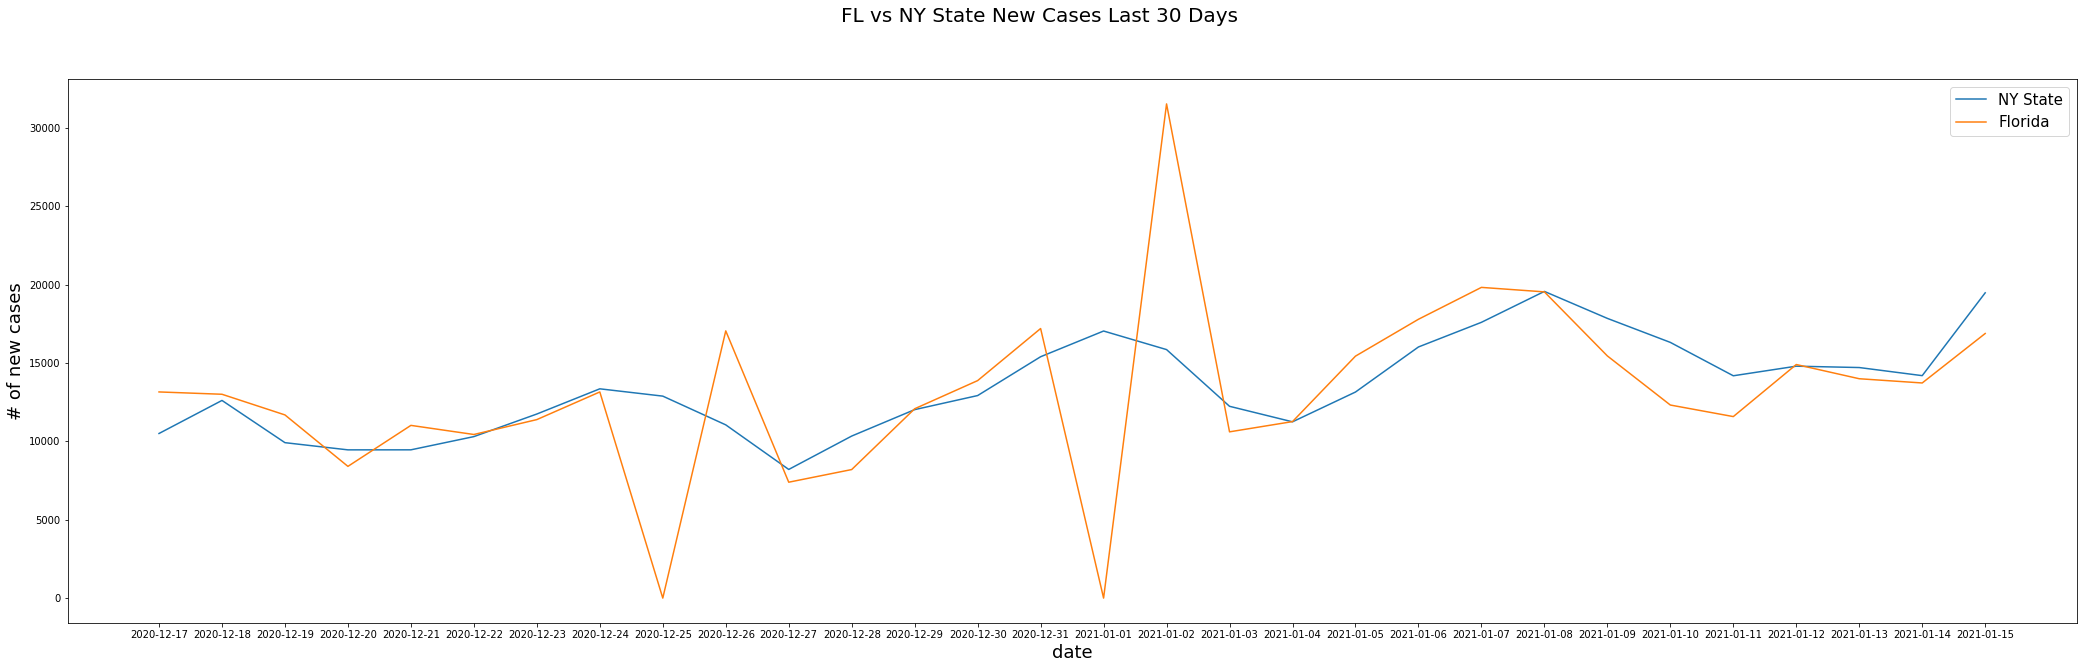

In [313]:
#comparing new cases
plt.figure(figsize=(36,10))
plt.suptitle("FL vs NY State New Cases Last 30 Days", fontsize = 20)
plt.xlabel("date", fontsize=18)
plt.ylabel("new cases", fontsize=18)

#NY State line
NY_x = last_30_days.index
NY_y = last_30_days["new cases"]
plt.plot(NY_x, NY_y, label = "NY State")

#FL line
FL_x = FL_last_30_days.index
FL_y = FL_last_30_days["new cases"]
plt.plot(FL_x, FL_y, label = "Florida")

plt.xlabel("date")
plt.ylabel("# of new cases")
plt.legend(prop = {"size" : 15})

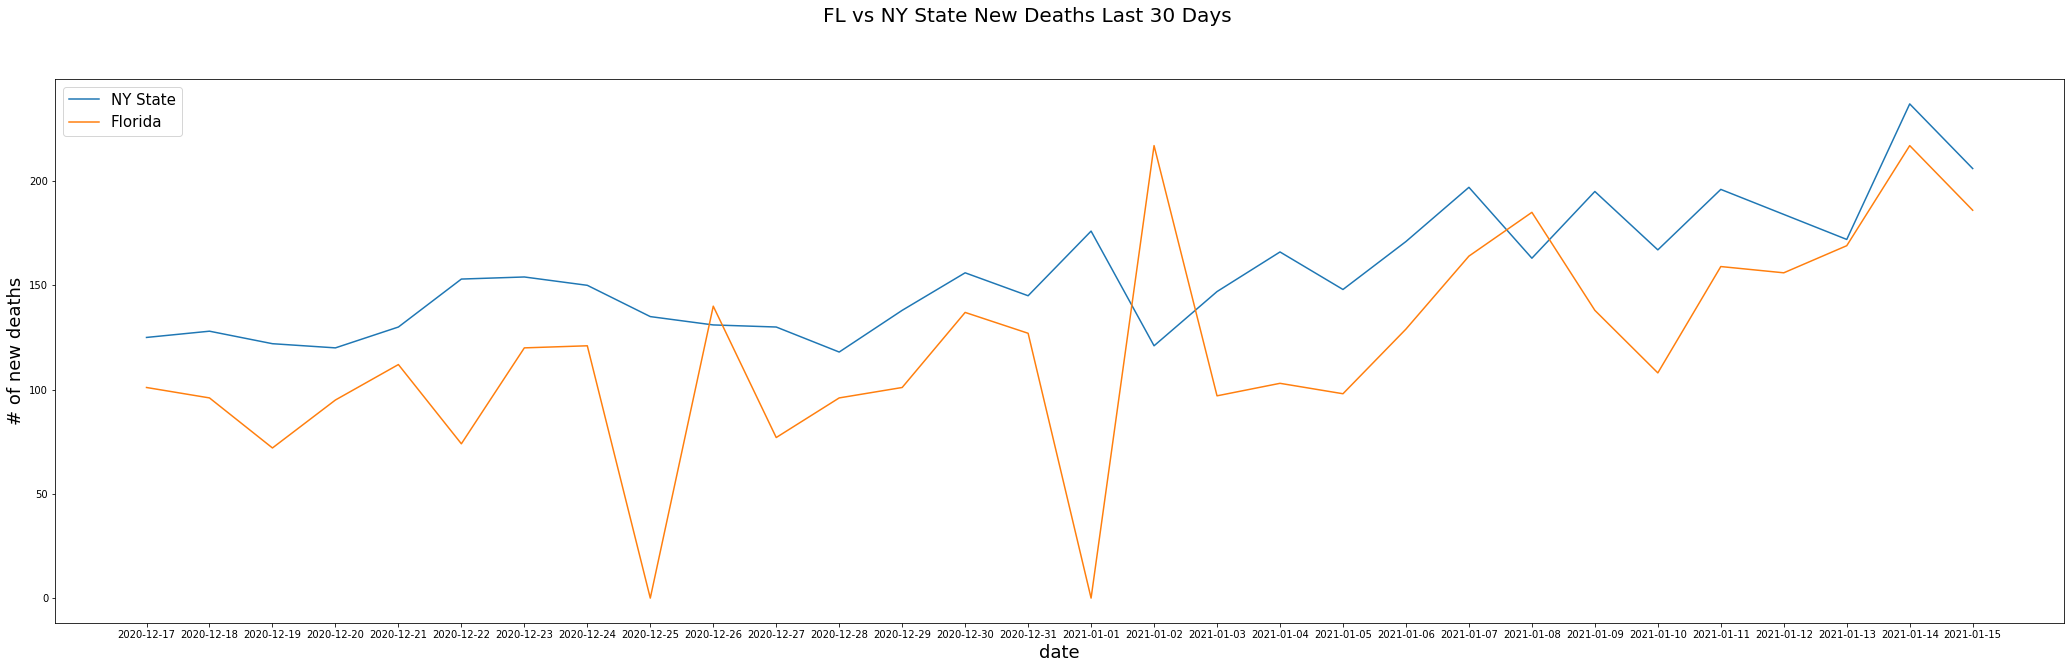

In [314]:
#comparing new deaths
plt.figure(figsize=(36,10))
plt.suptitle("FL vs NY State New Deaths Last 30 Days", fontsize = 20)
plt.xlabel("date", fontsize=18)
plt.ylabel("new cases", fontsize=18)

#NY State line
NY_x = last_30_days.index
NY_y = last_30_days["new deaths"]
plt.plot(NY_x, NY_y, label = "NY State")

#FL line
FL_x = FL_last_30_days.index
FL_y = FL_last_30_days["new deaths"]
plt.plot(FL_x, FL_y, label = "Florida")

plt.xlabel("date")
plt.ylabel("# of new deaths")
plt.legend(prop = {"size" : 15})

In [316]:
print("Florida Data Summary:")
print("Averages in Last 30 Days")
print(FL_last_30_days.mean(axis=0))

print("\nStandard Deviations in Last 30 Days")
print(FL_last_30_days.std(axis=0))

print("\nMin and Max in Last 30 Days")
print("New Cases Max: " + str(max(FL_last_30_days["new cases"])))
print("New Cases Min: " + str(min(FL_last_30_days["new cases"])))
print("New Deaths Max: " + str(max(FL_last_30_days["new deaths"])))
print("New Cases Min: " + str(min(FL_last_30_days["new deaths"])))

Florida Data Summary:
Averages in Last 30 Days
new cases     13091.066667
new deaths      119.833333
dtype: float64

Standard Deviations in Last 30 Days
new cases     5759.667872
new deaths      50.778140
dtype: float64

Min and Max in Last 30 Days
New Cases Max: 31518
New Cases Min: 0
New Deaths Max: 217.0
New Cases Min: 0.0


I chose to compare NY to FL because Florida has the closest population density to New York. Florida had an estimated population density of 400.7 people per square mile in 2019, while New York had an estimated population density of 412.8 people per square mile in 2019 (Statista). Population density is an important factor in the spread of COVID because COVID spreads through contact with infected persons.

From our comparative analysis, we can see that Florida's COVID cases and deaths are more volatile than New York's. It is also interesting to note that COVID deaths in Florida average 120 per day while COVID deaths in New York average 156 per day because Florida has an older population than New York, and the elderly are supposed to be more at risk. More research and analysis is needed to determine if these differences are statistically significant and what could be the cause of the differences.

# **Conclusion**

From our comparative analysis of NY state COVID data with NYC data and Florida data, we can begin to develop further questions and future areas of research.
NY state and NYC data appeared to move mostly in tandem. This was surprising to me because the population density in NYC is much higher than many other areas in the state, so I expected NYC to have greater volatility than the state as a whole. In addition, Florida had much more volatility in new cases and deaths than New York, but had overall lower new deaths even in spite of having similar new cases. More analysis is needed to see if these findings are statistically significant. If they are significant, more research is needed to find the cause of the difference. 